In [1]:
# multidimensional arrays
import numpy as np

import numpy.random as rand

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Return to the origin


For a *finite* random walk of (large) length $n$, it is known that the expected number of returns to the origin $T_n$ scales like follows:
$$
\left\langle T_n \right\rangle \sim \left\{
\begin{array}{ll}
\sqrt{n} & d=1 \\
\log(n) & d=2 \\
C_d & d\geq 3
\end{array}
\right.
$$


<img src="attachment:image.png" width="600">

Notice that for $d \geq 3$, $\left\langle T_n \right\rangle$ does **not** grow with $n$, which must mean that the walker somehow "escapes" and never returns back to the origin. The probability of return to the origin is less than 1! For an infinite-length random walk, indeed the probability of returning to the origin $\rho$ is seen to be

$$
\rho \sim \left\{
\begin{array}{ll}
1 & d=1 \\
1 & d=2 \\
<1 & d\geq 3
\end{array}
\right.
$$

The *intuitive* explanation of this amazing fact is that, as the dimension $d$ grows, there are "more directions available", and so more chances for the walker to "get lost" and never return to the origin. There is of course a formal proof as well, but today we will do a **computational verification** of these facts, which is no substitute for a formal proof but is often all we can do!

## Generating Random Walks


### Exercise 3.1
Write a function that generates a random walk of given length in $d$ dimensions. Your random walker should move as follows:

+ At each time-step, the walker moves only in one direction.
+ At each time-step, the walker moves only by -1 or +1

Your function should return a numpy array of shape (`length`, `dim`). Example:
```python
>>> # create a RW of length 10 in dimension 3
>>> traj = get_traj(length=10, dim=3)
>>> # check that the output has the right shape
>>> traj.shape
(10, 3)
```

In [18]:
from operator import length_hint


def get_traj(length=100, dim=2):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW


    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    step =rand.randint(low = 0, high = 2, size = length)
    dir = rand.randint(low = 0, high = dim, size = length)
    step = step*2 -1

    #print(step)

    out = np.zeros((length,dim))

    for i in range(length-1):
        out[i+1,:] = out[i,:]
        out[i+1,dir[i]] = out[i+1,dir[i]] + step[i]
    return out

#print( get_traj(100,3))

### Verification
To make sure that your function works correctly, execute the following cell. Notice the use of `assert` statements: execution should fail if something goes wrong. If everything is fine, nothing should happen.

In [3]:
# basic checks for your RW generator
for dim in range(1, 5):
    for length in [10, 100, 200, 500]:
        traj = get_traj(length=length, dim=dim)
        # make sure traj has the right shape
        assert traj.shape == (length, dim)
        # make sure all steps are -1 or 1 in only one direction
        assert np.all(np.sum(np.diff(traj, axis=0) != 0, axis=1) == np.ones(length - 1))

### Exercise 3.2
Plot a random walk of length $10^4$ for $d=1$ (time in x-axis, position in y-axis) and $d=2$ (x,y components in x,y-axis). Remember to use **axis labels**.

In [7]:
# it is better if you use one cell to generate the random walks, and a second cell to plot them
RW_1d = get_traj(10**4,1)
RW_2d = get_traj(10**4,2)

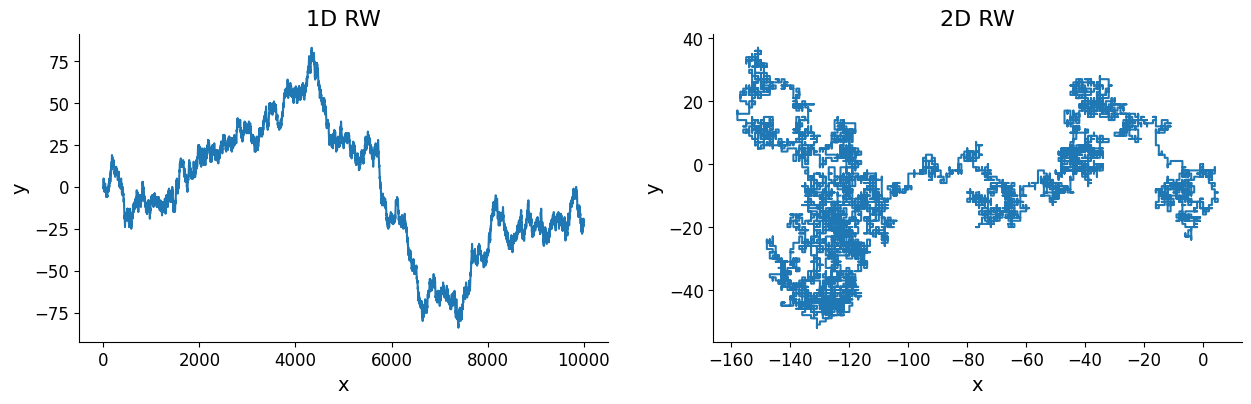

In [9]:
# We generate a figure with two subplots, called axis in matplotlib.
#
# To use the left subplot, we do
# ax1.plot(...)
#
# while to use the right subplot, we do
# ax2.plot(..)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

ax1.plot(RW_1d, label = "1D")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("1D RW")
ax2.plot(RW_2d[:,0], RW_2d[:,1],  label = "2D")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("2D RW")
plt.show()


## Counting the number of returns to the origin
Since we are interested in how **the expected number of returns to the origin** scales with the RW length, we don't need to store the whole trajectory of each simulation (we will be performing many simulations!). 

### Exercise 3.3
Write a function that generates a RW of given length and dimension (calling `get_traj`), and returns the number of times it returned to the origin. To count the number of returns to the origin, you might need to use the following functions:
```python
np.all()
np.zeros()
```

In [77]:
def get_num_returns(length, dim):
    # generate a RW of given length and dimension
    traj = get_traj(length, dim)

    origin = np.zeros((1,dim))
    # count how many times it goes through the origin
    counter = 0

    for i in range(length-1) :
        if np.array_equiv( traj[i+1,:] ,origin) :
            counter = counter +1
        
    return counter


# print( get_num_returns(1000,1))
# print( get_num_returns(1000,2))

### Exercise 3.4
Write a function that computes the expected number of returns to the origin for a given length and dimension. Your function will call `get_num_returns()`, and should have an additional parameter that sets the sample size.

In [78]:
def get_average_num_returns(length, dim, num_trajs=200):

    print( "Average return to Origin for \n\tlenght:{}  dim:{}".format(length, dim))
    
    data = np.zeros(num_trajs)
    for i in range(num_trajs):
        data[i] = get_num_returns(length,dim)
    out = np.mean(data)
    return out


length_bounds = (10,11)
my_dim = 2

sample = np.arange(length_bounds[0], length_bounds[1])
#print(sample)

data = np.empty(sample.size)
for i in range(sample.size):
    data[i] = get_average_num_returns(sample[i], my_dim)

print(data)

Average return to Origin for 
	lenght:10  dim:2
[0.565]


## Comparing with analytical results
We are now ready to compare our analytical results with numerical simulations! We want to plot the expected number of returns to the origin as a function of the RW length. To do this, it is useful to first define an array of RW lengths.

In [74]:
# define range of RW lengths
length_min = 10
length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

(tip: if your RW generating function is not very efficient, you might want to decrease `length_min`)  

Executing the following cell will run all simulations for $d=1$


In [37]:
dim=1
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Average return to Origin for 
	lenght:10  dim:1
Average return to Origin for 
	lenght:16  dim:1
Average return to Origin for 
	lenght:26  dim:1
Average return to Origin for 
	lenght:42  dim:1
Average return to Origin for 
	lenght:69  dim:1
Average return to Origin for 
	lenght:112  dim:1
Average return to Origin for 
	lenght:183  dim:1
Average return to Origin for 
	lenght:297  dim:1
Average return to Origin for 
	lenght:483  dim:1
Average return to Origin for 
	lenght:784  dim:1
Average return to Origin for 
	lenght:1274  dim:1
Average return to Origin for 
	lenght:2069  dim:1
Average return to Origin for 
	lenght:3359  dim:1
Average return to Origin for 
	lenght:5455  dim:1
Average return to Origin for 
	lenght:8858  dim:1
Average return to Origin for 
	lenght:14384  dim:1
Average return to Origin for 
	lenght:23357  dim:1
Average return to Origin for 
	lenght:37926  dim:1
Average return to Origin for 
	lenght:61584  dim:1
Average return to Origin for 
	lenght:100000  dim:1


### Exercise 3.5
Plot the average number of returns to the origin of a 1D RW as a function of the RW length, together with the expected theoretical result. Do your results verify the $n^{1/2}$ scaling? **Tip** Use double-logarithmic scales in your plot. Remember to include label axis, and a legend!

Text(0.5, 1.0, '1D random walk return to origin scalings')

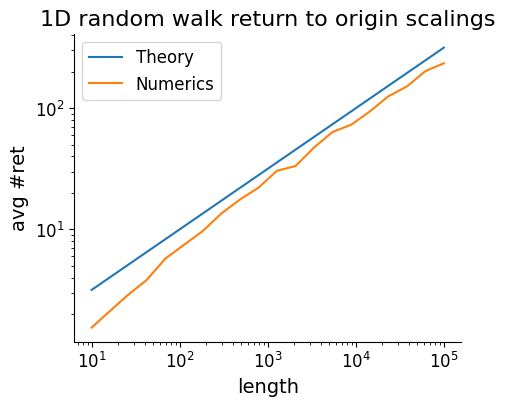

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result
ax.loglog( length_array, np.sqrt(length_array), label="Theory")
# plot numerical result
ax.loglog( length_array,num_returns_array , label="Numerics")
# add axis labels
ax.set_xlabel("length")
ax.set_ylabel("avg #ret")
# add a legend
ax.legend()
...
# add a title (e.g. that says what dimension we used)
ax.set_title("1D random walk return to origin scalings")

### Exercise 3.6
Plot the average number of returns to the origin of a 2D RW as a function of the RW length. Do your results verify the $log(n)$ scaling? What are the best axis scales to use in this case?

Motivation:

I'm using logarithmic axis just for the x axis. That should result in a linear plot in 2D and still a constant function plot for 3 and 4 dimensions

In [61]:
# do the simulations for d=2
dim=2
num_returns_array_2 = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Average return to Origin for 
	lenght:10  dim:2
Average return to Origin for 
	lenght:16  dim:2
Average return to Origin for 
	lenght:26  dim:2
Average return to Origin for 
	lenght:42  dim:2
Average return to Origin for 
	lenght:69  dim:2
Average return to Origin for 
	lenght:112  dim:2
Average return to Origin for 
	lenght:183  dim:2
Average return to Origin for 
	lenght:297  dim:2
Average return to Origin for 
	lenght:483  dim:2
Average return to Origin for 
	lenght:784  dim:2
Average return to Origin for 
	lenght:1274  dim:2
Average return to Origin for 
	lenght:2069  dim:2
Average return to Origin for 
	lenght:3359  dim:2
Average return to Origin for 
	lenght:5455  dim:2
Average return to Origin for 
	lenght:8858  dim:2
Average return to Origin for 
	lenght:14384  dim:2
Average return to Origin for 
	lenght:23357  dim:2
Average return to Origin for 
	lenght:37926  dim:2
Average return to Origin for 
	lenght:61584  dim:2
Average return to Origin for 
	lenght:100000  dim:2


Text(0.5, 1.0, '2D random walk return to origin scalings')

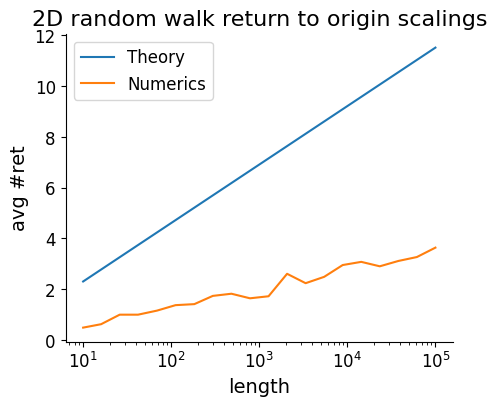

In [70]:
# plot the numerical results + theory
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_xscale('log')
# plot theoretical result
ax.plot( length_array, np.log(length_array), label="Theory")
# plot numerical result
ax.plot( length_array, num_returns_array_2 , label="Numerics")
# add axis labels
ax.set_xlabel("length")
ax.set_ylabel("avg #ret")

# add a legend
ax.legend()
...
# add a title (e.g. that says what dimension we used)
ax.set_title("2D random walk return to origin scalings")

### Exercise 3.7
Show numerically that, for $d=3$ and $d=4$, the expected number of returns to the origin is **constant**.

In [ ]:
# your numerical answer here
# you can use more than one cell of course!
# use markdown cells and code cells if necessary

In [79]:
# do the simulations for d=3
dim=3
num_returns_array_3 = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Average return to Origin for 
	lenght:10  dim:3
Average return to Origin for 
	lenght:16  dim:3
Average return to Origin for 
	lenght:26  dim:3
Average return to Origin for 
	lenght:42  dim:3
Average return to Origin for 
	lenght:69  dim:3
Average return to Origin for 
	lenght:112  dim:3
Average return to Origin for 
	lenght:183  dim:3
Average return to Origin for 
	lenght:297  dim:3
Average return to Origin for 
	lenght:483  dim:3
Average return to Origin for 
	lenght:784  dim:3
Average return to Origin for 
	lenght:1274  dim:3
Average return to Origin for 
	lenght:2069  dim:3
Average return to Origin for 
	lenght:3359  dim:3
Average return to Origin for 
	lenght:5455  dim:3
Average return to Origin for 
	lenght:8858  dim:3
Average return to Origin for 
	lenght:14384  dim:3
Average return to Origin for 
	lenght:23357  dim:3
Average return to Origin for 
	lenght:37926  dim:3
Average return to Origin for 
	lenght:61584  dim:3
Average return to Origin for 
	lenght:100000  dim:3


In [80]:
# do the simulations for d=4
dim=4
num_returns_array_4 = np.array([
    get_average_num_returns(length=length, dim=dim)
    for length in length_array
])

Average return to Origin for 
	lenght:10  dim:4
Average return to Origin for 
	lenght:16  dim:4
Average return to Origin for 
	lenght:26  dim:4
Average return to Origin for 
	lenght:42  dim:4
Average return to Origin for 
	lenght:69  dim:4
Average return to Origin for 
	lenght:112  dim:4
Average return to Origin for 
	lenght:183  dim:4
Average return to Origin for 
	lenght:297  dim:4
Average return to Origin for 
	lenght:483  dim:4
Average return to Origin for 
	lenght:784  dim:4
Average return to Origin for 
	lenght:1274  dim:4
Average return to Origin for 
	lenght:2069  dim:4
Average return to Origin for 
	lenght:3359  dim:4
Average return to Origin for 
	lenght:5455  dim:4
Average return to Origin for 
	lenght:8858  dim:4
Average return to Origin for 
	lenght:14384  dim:4
Average return to Origin for 
	lenght:23357  dim:4
Average return to Origin for 
	lenght:37926  dim:4
Average return to Origin for 
	lenght:61584  dim:4
Average return to Origin for 
	lenght:100000  dim:4


Text(0.5, 1.0, 'Constant return scaling for 3/4D RW')

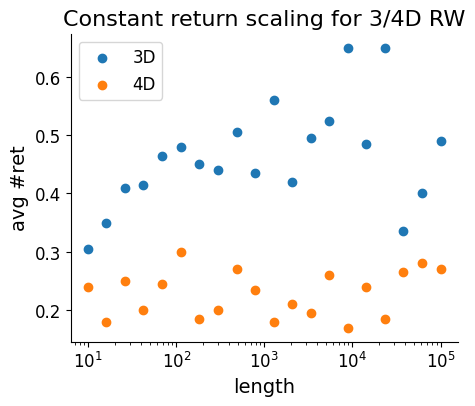

In [82]:
# plot the numerical results + theory
fig,ax = plt.subplots(1,1, figsize=(5, 4))
ax.set_xscale('log')
# plot numerical result

ax.scatter( length_array, num_returns_array_3 , label="3D")
ax.scatter( length_array, num_returns_array_4 , label="4D")
# add axis labels
ax.set_xlabel("length")
ax.set_ylabel("avg #ret")

# add a legend
ax.legend()
...
# add a title (e.g. that says what dimension we used)
ax.set_title("Constant return scaling for 3/4D RW")

# Self-Avoiding Walks
Self-avoiding walks (SAW) are simply random walks in a regular lattice with the additional constraint that no point can be visited more than once. That is, SAWs cannot intersect themselves. The most well-known application of SAW is to model linear polymers, where obviously two monomers cannot occupy the same space (excluded volume effect).


You can read more about self-avoiding walks in this nice introduction by Gordon Slade:

[Self-Avoiding Walks, by Gordon Slade](https://www.math.ubc.ca/~slade/intelligencer.pdf)

## Simulating Self-Avoiding Walks
Generating a SAW is not trivial. If you try to generate a SAW stochastically, that is, one step at a time, you will miserably fail: your walker might get into traps (configurations with no allowed movements), and if it does you will have to discard your simulation. It turns out you will have to discard your simulation *really* often, so that for large lengths, you will basically never find a valid path. In addition, the paths you will find for short lengths will not come up with the right probabilities. Bear in mind that we want to **uniformly sample** the set of SAW of given length $n$, SAW($n$). That is, we want that all paths from SAW($n$) are generated with the same probability.

The solution is to use a Monte Carlo algorithm that, given one element $\alpha \in \text{SAW}(n)$, generates a new one $\beta \in \text{SAW}(n)$ with some probability $P_{\alpha \beta}$. If in addition our algorithm satisfies **detailed balance** and is **ergodic**, then we known that it will converge to the equilibrium distribution (the uniform distribution in our case).


## The pivot algorithm
We will implement the pivot algorithm, which is simple, effective, and satisfies detailed balance and ergodicity. You can read about the details of the pivot algorithm here:

[The Pivot Algorithm: A Highly Efficient Monte Carlo Method for the Self-Avoiding Walk](https://link.springer.com/article/10.1007/BF01022990)

(tip: if you're at home, **do not** use tools such as sci-hub to download the paper).

Given a self-avoiding walk of length $n$, the pivot algorithm generates the next walk $\beta \in \text{SAW}(n)$ as follows:

1. **Choose a point of $\alpha$ at random**, splitting the path in two bits: the head (from the origin to the chosen point) and the tail (from the chosen point to the end of the path). Notice that both the head and the tail are SAWs.
2. **Apply a transformation to the tail**, leaving the head intact. The transformation must be an orthoganl transformation that leaves the regular lattice intact (so, either a reflection or a $90º, 180º$ or $270º$ rotation). For simplicity, we will use only **rotations** (read the paper to see why this is ok).
3. **Check if the new path is self-avoiding**. If so, return it. Otherwise, return the original path.

Iterating these steps one obtains a **Markov** chain of SAWs: $\alpha_1 \to \alpha_2 \to \dots \to \alpha_M $. Notice that $\alpha_i$ are not uncorrelated, but because the algorithm satisfies detailed balance and is ergodic, we know that it approaches the equilibrium distribution. This means that we can use our Markov chain to compute **expected values** as long as it is long enough.

## Implementing the pivot step in 2D
To implement the **pivot algorithm** in 2D, we will write one function that does steps 1 and 2, and another function that does step 3. We will also need a function to generate standard 2D random walks.

### Exercise 3.8
Write a function `get_traj` that generates a 2D random walk of given length.

In [7]:
#no need to write a new method
#the old get_traj has default dim = 2

# def get_traj(length):
#     """Generate a 2D random walk of given length"""
#     return get_traj(length,2)

### Exercise 3.9
Write a function `pivot_traj` that, given a 2D random walk, performs steps 1 and 2 of the pivot algorithm. Some useful functions:
```python
np.random.randint()
np.concatenate()
```
You might also want to multiply matrices using the `@` operator:
```python
>>> a = np.array([[1, 2], [3, 4], [5, 6]])
>>> b = np.array([1, 1])
>>> a @ b
array([ 3,  7, 11])
```


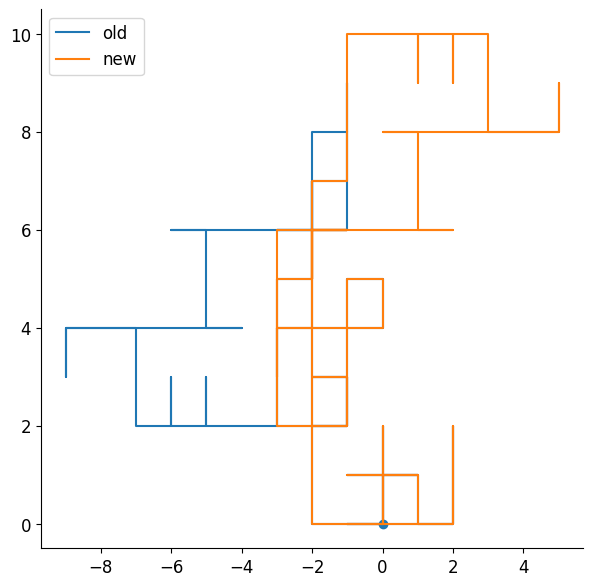

In [14]:
def pivot_traj(traj):
    """Apply a random rotation to part of a RW."""
    
    # choose the pivot

    # must have at leat 3 ponits otherwise np.split behaves strange
    # on a second tohught we cant have intersections before the second point
    assert traj.shape[0]>3

    #tail and head must be longer than 1 node
    pivot_index = rand.randint(1, traj.shape[0]-1)
    pivot_point = traj[pivot_index]

    #print(pivot_index, "//", pivot_point)

    # split head and tail
    traj_head , traj_tail = np.split(traj,[pivot_index], axis = 0)
    #print(traj_head, "\n##\n" ,traj_tail)
    
    # define the rotation matrices
    symmetries = [
        # 90 deg rotation
        np.array([[ 0,1 ], [-1 ,0 ]]),
        # 180 deg rotation
        np.array([[-1 ,0 ], [0 ,-1 ]]),
        # 270 deg rotation
        np.array([[0 ,-1 ], [1 ,0 ]]),
    ]
    
    # choose one rotation at random
    symmetry = symmetries[rand.randint(0, len(symmetries))]
    #print(symmetry)

    # apply the transformation to the tail
    # we obtain the symmetry about the pivot point by DIY congruence of translation matrixes
    new_tail = ((traj_tail - pivot_point) @ symmetry  ) + pivot_point
    
    # join the old head with the new tail
    new_traj = np.concatenate((traj_head, new_tail))
    
    return new_traj

old_tr = get_traj(100)
new_tr = pivot_traj(old_tr)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(old_tr[:,0], old_tr[:,1], label = "old")
ax.plot(new_tr[:,0], new_tr[:,1],  label = "new")
ax.scatter([0],[0])
ax.legend()

### Exercise 3.10
Write a function that counts the number of self-intersections of a RW. Notice that SAWs have 0 self intersections, so that will solve step 3 of the pivot algorithm, but will also be useful to generate the initial condition. One way of approaching this exercise is to count how many *different* points the path visits.

In [19]:
def count_self_intersections(traj):
    #set should have an optimized way to count references

    point_set = set()

    for i in range(traj.shape[0]) :
        point_set.add( tuple(traj[i,:]))
    
    num_self_intersections = traj.shape[0] - len(point_set)

    #print(point_set)
    return num_self_intersections

### Exercise 3.11
Verify that your `count_self_intersecitons` function works properly by using short trajectories for which you know the answer.

In [21]:
# your verifications here

tr = get_traj(10)
print(tr)
print(count_self_intersections(tr))

[[ 0.  0.]
 [-1.  0.]
 [-1.  1.]
 [-1.  0.]
 [-1. -1.]
 [ 0. -1.]
 [ 0.  0.]
 [ 0. -1.]
 [ 0.  0.]
 [ 0.  1.]]
4


## Generating the initial condition
You might have noticed that the pivot algorithm requires an element of SAW($n$) as starting condition, to then generate a Markov chain easily. But how do you get this first element? We will use the following strategy:
1. Generate a standard 2D random walk, and count the number of self intersections.
2. Apply the pivot transformation to get a new 2D random walk, and count the number of self-intersections-
3. If the number of self-intersections has decreased or not changed, keep the new path. Else, keep the old one.
4. Go to 2, till the number of self-intersections is 0.

### Exercise 3.12
Write a function `get_first_SAW` that generates a SAW of given length

In [22]:
def get_first_SAW(length, max_tries=1000000):
    
    my_traj = get_traj(length)

    for i in range(max_tries):

        candidate = pivot_traj(my_traj)
        inter = count_self_intersections(candidate)

        if inter <= count_self_intersections(my_traj):
            my_traj = candidate
            print("Generating SAW: {} intersections left at iteration {}".format(inter, i))

        if count_self_intersections(my_traj) == 0 :
            break

    return my_traj

### Exercise 3.13
Generate and plot some 2D SAWs of different lengths. Be carefull, raise the length slowly! You can measure how long a cell takes executing using the `%%time` magic at the top of a cell.

Generating SAW: 39 intersections left at iteration 0
Generating SAW: 39 intersections left at iteration 1
Generating SAW: 38 intersections left at iteration 2
Generating SAW: 38 intersections left at iteration 5
Generating SAW: 33 intersections left at iteration 6
Generating SAW: 32 intersections left at iteration 7
Generating SAW: 32 intersections left at iteration 12
Generating SAW: 32 intersections left at iteration 15
Generating SAW: 32 intersections left at iteration 16
Generating SAW: 31 intersections left at iteration 18
Generating SAW: 30 intersections left at iteration 20
Generating SAW: 28 intersections left at iteration 23
Generating SAW: 27 intersections left at iteration 24
Generating SAW: 27 intersections left at iteration 39
Generating SAW: 26 intersections left at iteration 46
Generating SAW: 25 intersections left at iteration 48
Generating SAW: 24 intersections left at iteration 53
Generating SAW: 24 intersections left at iteration 55
Generating SAW: 24 intersections l

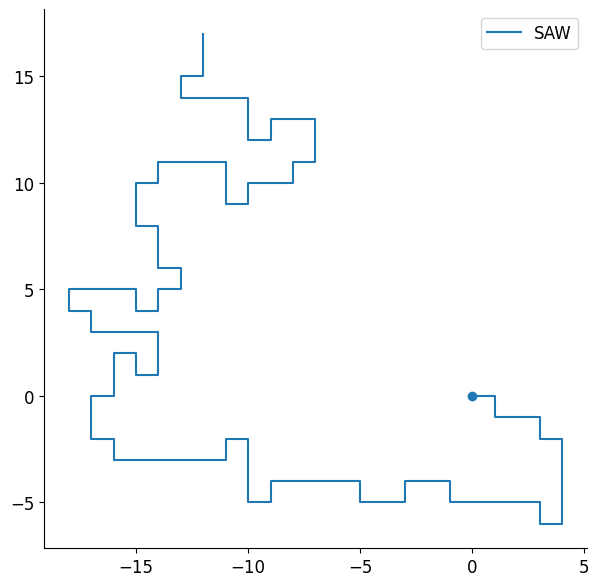

In [24]:
# your answer here
# use more than one cell!

#first try
#takes less than 1s
# SAW is plotted at the bottom of the debug output

saw = get_first_SAW(100)


fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(saw[:,0], saw[:,1], label = "SAW")
ax.scatter([0],[0])
ax.legend()

Generating SAW: 613 intersections left at iteration 0
Generating SAW: 609 intersections left at iteration 1
Generating SAW: 600 intersections left at iteration 5
Generating SAW: 598 intersections left at iteration 7
Generating SAW: 577 intersections left at iteration 8
Generating SAW: 572 intersections left at iteration 13
Generating SAW: 570 intersections left at iteration 16
Generating SAW: 568 intersections left at iteration 30
Generating SAW: 567 intersections left at iteration 32
Generating SAW: 560 intersections left at iteration 36
Generating SAW: 555 intersections left at iteration 41
Generating SAW: 555 intersections left at iteration 44
Generating SAW: 547 intersections left at iteration 45
Generating SAW: 537 intersections left at iteration 55
Generating SAW: 536 intersections left at iteration 59
Generating SAW: 536 intersections left at iteration 62
Generating SAW: 533 intersections left at iteration 69
Generating SAW: 532 intersections left at iteration 70
Generating SAW:

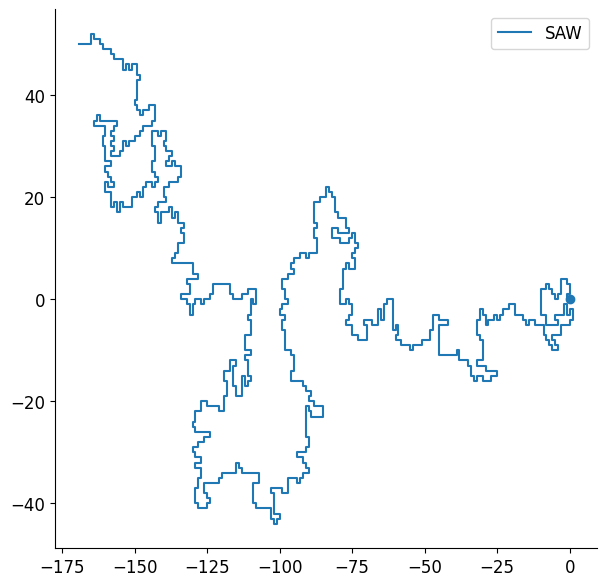

In [25]:
#1000
# generation time is around 2 mins
# SAW is plotted at the bottom of the debug output

saw = get_first_SAW(1000)


fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(saw[:,0], saw[:,1], label = "SAW")
ax.scatter([0],[0])
ax.legend()

Generating SAW: 6935 intersections left
Generating SAW: 6930 intersections left
Generating SAW: 6890 intersections left
Generating SAW: 6883 intersections left
Generating SAW: 6864 intersections left
Generating SAW: 6864 intersections left
Generating SAW: 6782 intersections left
Generating SAW: 6772 intersections left
Generating SAW: 6695 intersections left
Generating SAW: 6582 intersections left
Generating SAW: 6551 intersections left
Generating SAW: 6528 intersections left
Generating SAW: 6477 intersections left
Generating SAW: 6402 intersections left
Generating SAW: 6391 intersections left
Generating SAW: 6391 intersections left
Generating SAW: 6279 intersections left
Generating SAW: 6277 intersections left
Generating SAW: 6262 intersections left
Generating SAW: 6240 intersections left
Generating SAW: 6203 intersections left
Generating SAW: 6189 intersections left
Generating SAW: 6179 intersections left
Generating SAW: 6159 intersections left
Generating SAW: 6158 intersections left


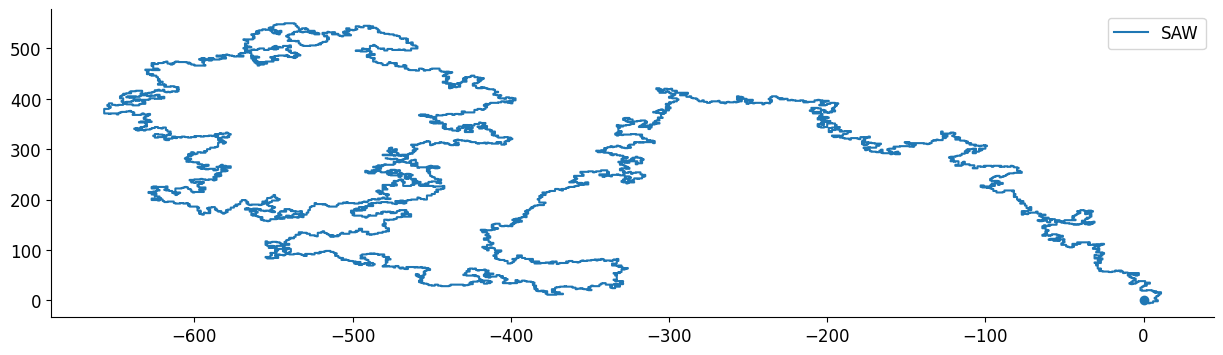

In [62]:
#10000
#took more or less 12h (should have definitely split creation and plotting)

# using an old debug output so i can't see the number of iteration
# the plot is not a square
# i'm not willing to invest 12 more hours to fix it :()

# SAW is plotted at the bottom of the debug output

saw = get_first_SAW(10000)


fig, ax = plt.subplots(1, 1, figsize=(15, 4))

ax.plot(saw[:,0], saw[:,1], label = "SAW")
ax.scatter([0],[0])
ax.legend()

### Exercise 3.14
Write a function `get_next_SAW` that, given a SAW, generates another SAW using the pivot algorithm. Your function should check that the input RW is really a SAW. Remember the steps:

1. Apply the pivot transformation
2. Check if the new path is self-avoiding. **If so, return it. Otherwise, return the original path.**

In [63]:
def get_next_SAW(traj):
    # make sure input traj is SAW
    assert count_self_intersections(traj) == 0
    
    # pivot step
    proposed_traj = pivot_traj(traj)
    
    # count intersections
    num_intersections = count_self_intersections(proposed_traj)
    
    # if it's a SAW
    if count_self_intersections(proposed_traj) == 0 :
        return proposed_traj
    
    # if not
    else:
        return traj

### Mean Squared Displacement in SAW
A quantity of interest in RWs is the mean squared displacement, which is simply the (squared) distance between the endpoints of the walk. Usually, one writes

$$
\left\langle X(n)^2 \right\rangle \sim n^{2 \nu}
$$

As you know, for a standard RW of $n$ steps, the mean-squared displacement scales like $n$, so $\nu=1/2$. However, the exponent for SAW is **different**! Althought it has not been formally proven (still), it is believed that the exponent for SAW is $\nu=3/4$. That is, for a self-avoiding random walk, the mean squared displacement scales as $n^{3/2}$.

### Exercise 3.15
Explain why it makes sense that the mean-squared displacement exponent of SAW is **greater** than that of standard RW. 

Using the pigeonhole principle one can set a lower bound for the squared displacement of a given SAW of a given lenght, that is given by the number that is derived by the particolar SAW which progressively coils around the origin leaving no free cells.
Any other SAW of the same lenght will necessarily produce a squared displacement greater than the ever so rare coil SAW, and by a fair amount on average as one might observe.

This lower bound is nonexistent for regular RW and this allows for a considerable number of RW in the ensamble to have a squared displacement below the "coil SAW" benchmark

The lower bound can be tranlated to the idea that the "non intersection condition" obliges the self-avoiding Walker to walk further from ther origin

### Exercise 3.16
Verify numerically the scaling of the mean-squared displacement of SAW. Notice that you don't need to store all the SAWs, just the endpoints. You could follow this scheme:

1. Generate a first SAW with your `get_first_SAW()` function
2. Generate the next SAW using your `get_next_SAW()` function, and store the endpoint.
3. Iterate step 2 for as many steps as required
4. Compute the average mean-squared displacement of the stored endpoints

Then repeating steps 1-4 for different lengths, and plot the results in double-logarithmic axis. Compare your results with the theoretical exponent. Do they agree?

In [64]:
#squared displacement for a given trajectory
from numpy import linalg as LA

def rw_sq_disp(traj):
    endpoint = traj[-1:]

    return LA.norm(endpoint)**2

def saw_mean_sq_disp(length, sample = 100):

    my_saw = get_first_SAW(length)

    counter = np.empty(sample)

    for i in range(sample):
        my_saw = get_next_SAW(my_saw)

        counter[i] = rw_sq_disp(my_saw)

    print( "{}|step SAW // Squared displacement mean: {} , st dev: {}".format(length, counter.mean(), counter.std()))

    return counter.mean()


saw_mean_sq_disp(10, sample = 1000)

Generating SAW: 5 intersections left
Generating SAW: 3 intersections left
Generating SAW: 2 intersections left
Generating SAW: 2 intersections left
Generating SAW: 2 intersections left
Generating SAW: 2 intersections left
Generating SAW: 2 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 0 intersections left
10|step SAW // Squared displacement mean: 21.816 , st dev: 12.474860480181732


21.816

In [65]:
# define range of RW lengths
length_min = 10
length_max = 2000
# generate points logarithmically spaces
# and convert them to integers
saw_length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

In [66]:
saw_displacement_array = np.array([
    saw_mean_sq_disp(length=length, sample = 100)
    for length in saw_length_array
])

Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 0 intersections left
10|step SAW // Squared displacement mean: 19.12 , st dev: 10.48358717233753
Generating SAW: 1 intersections left
Generating SAW: 1 intersections left
Generating SAW: 0 intersections left
13|step SAW // Squared displacement mean: 34.64 , st dev: 25.32805559058966
Generating SAW: 4 intersections left
Generating SAW: 4 intersections left
Generating SAW: 4 intersections left
Generating SAW: 2 intersections left
Generating SAW: 2 intersections left
Generating SAW: 1 intersections le

Text(0.5, 1.0, '2D SAW squared displacement scaling')

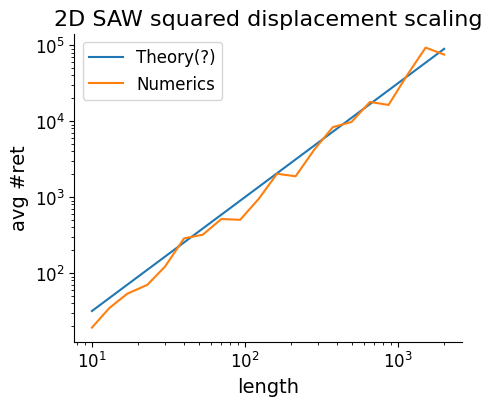

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# plot theoretical result
ax.loglog( saw_length_array, np.power(saw_length_array,1.5), label="Theory(?)")
# plot numerical result
ax.loglog( saw_length_array,saw_displacement_array , label="Numerics")
# add axis labels
ax.set_xlabel("length")
ax.set_ylabel("avg #ret")
# add a legend
ax.legend()
...
# add a title (e.g. that says what dimension we used)
ax.set_title("2D SAW squared displacement scaling")